<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Bayesian Statistics - Priors Exercise

_Author: Alex Combs (NYC) _

---

## This game is a mixture of game theory and Bayes!

The goal is to show that your prior assumption matters. You can use your understanding of a system to try to make an informed prior.

### Here's the game:
- You have a hypothetical coin. You can choose its bias. (For example, $p = 0.6$, where $p$ is likelihood of heads.)  Heads will be represented by 1, tails by 0.
- You are playing against one other team.
- You will generate 3 random flips of your coin (using the bias).
- Based on these 3 flips alone, the other team will try to guess your bias
- You, similarly, will get 3 flips from them and will try to guess their bias
- If your opponent is right to within +/- 0.1, you owe them sweets.  If they are wrong, they owe you sweets.
- Similarly, if you guess your opponent's bias to within +/- 0.1, you get sweets from them.  If you are wrong, you owe them sweets.

### Here's the catch.  
The number of sweets you pay / receive is proportional to the bias. ... And the sweets are hypothetical.

Example: 

- I choose 0.95 bias.  My opponent guesses correctly.  I owe them 95 sweets.
- I choose 0.5 bias.  My opponent guesses incorrectly.  They owe me 50 sweets.
- I choose 0.1 bias.  My opponent guesses correctly.  I owe them 10 sweets.

### Some things to consider:

- What bias will be easier / harder to guess based on only 3 flips?
- Given that you are only getting three random flips, how can you set your prior to best be able to guess the bias?
- Given the skewed payout, are you incentivized to pick a high / low bias?
- Given that your opponent knows this, what do you think they will do with their prior belief?
- Given that, what should you do with your bias?
- Etc etc

# TIMELINE

1. You have 10 minutes in your teams to decide your bias.  You must submit the bias to an instructor.

2. Once all biases are submitted, you have 10 minutes as a team to decide on your prior.

3. Once all prior are settled, you must generate your three random coin tosses based on your own bias and provide to the other team

4. Based on the tosses provided by the other team, try to guess their bias!

You can try to write the code yourself based on the lesson, or you can use the below code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma
%matplotlib inline

** To generate the random coin tosses ** 

In [3]:
# insert your chosen bias here.  This is the probability of getting heads (which we represent as 1)
p = 0.35

In [4]:
#generate your three flips below.  Give these to you opponent.
for i in range(3):
    if np.random.rand()>p:
        print 0
    else:
        print 1

0
1
0


** To generate your prior** 

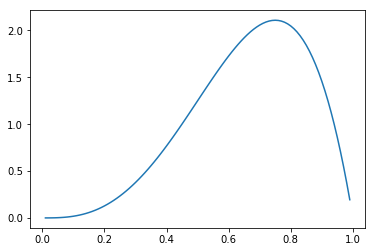

In [8]:
# play around with a and b in the below code to generate your prior.  The intuition is that it's as if you 
# run this experiment before and a is the number of heads (1s) you saw and b the number of tails

a = 4
b = 2

# likelihood
def B(x):
    return lambda p: (p**x) * (1-p)**(1-x)

# prior
# This is the pdf of the Beta distribution
# See https://en.wikipedia.org/wiki/Beta_distribution#Probability_density_function)
def Beta(a, b):
    return lambda p: (gamma(a+b) / (gamma(a)*gamma(b))) * np.exp((a-1)*np.log(p)) * np.exp((b-1)*np.log(1-p))

prior = Beta(a,b)
prior = np.vectorize(prior)

P1 = np.arange(0.01,1, 0.01)
priorGraph = [prior(p) for p in P1]
plt.plot(P1, priorGraph);

** To update based on the coin flips.  Based on this chart, can you guess the other team's bias?**

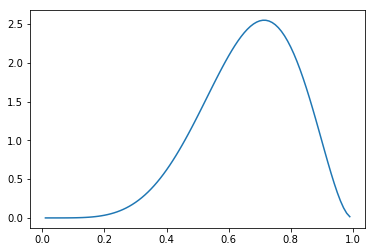

In [13]:
flip1 = 1
flip2 = 1
flip3 = 0

# posterior given three flips
post = lambda p: (B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior(p)) / \
                 (quad(lambda p: B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior(p), 0,1 )[0])


postGraph = [post(p) for p in P1]
plt.plot(P1, postGraph);